## Getting Started

- Download MapPLUTO data from [NYC DCP](https://s-media.nyc.gov/agencies/dcp/assets/files/zip/data-tools/bytes/nyc_mappluto_24v1_1_shp.zip)
- Unzip the file and place contents in the `Data` directory at the root of this repo
- Make sure you have installed all requisite libraries by running `pip install -r requirements.txt` **_with your virtual environment activated_**

## Goals

- Load data from file
- Explore spatial and non-spatial elements of the dataset
- Compare tradeoffs between different methods of loading data
- Demonstrate tradeoffs in different file formats


In [80]:
# the bare minimum
import matplotlib.pyplot as plt
import geopandas as gpd

# more advanced
import pyogrio as ogr
from sklearn.cluster import KMeans
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap, apply_continuous_cmap
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm

import pydeck as pdk

# load PLUTO data


In [81]:
pluto_ogrio = gpd.read_file("../Data/DEP Green Infrastructure/geo_export_3298f6ed-a61a-4d9f-a900-907faeaebf16.shp")

In [82]:
pluto_ogrio = ogr.read_dataframe("../Data/nyc_mappluto_24v1_1_shp/MapPLUTO.shp")

# basic exploration


In [83]:
pluto_ogrio.columns

Index(['Borough', 'Block', 'Lot', 'CD', 'BCT2020', 'BCTCB2020', 'CT2010',
       'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthCent', 'HealthArea', 'Sanitboro', 'SanitDistr', 'SanitSub',
       'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4',
       'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight',
       'SplitZone', 'BldgClass', 'LandUse', 'Easements', 'OwnerType',
       'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes', 'UnitsTotal',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptTot', 'YearBuilt', 'YearAlter1', 'YearAlter2', 'HistDist',
       'Landmark', 'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode',
       'BBL', 'CondoNo', 'Tract2

In [84]:
pluto_ogrio.dtypes

Borough         object
Block            int64
Lot              int32
CD               int32
BCT2020         object
                ...   
Longitude      float64
Notes           object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
Length: 95, dtype: object

## categorical column


In [85]:
pluto_ogrio.nyc_waters.value_counts()

AttributeError: 'GeoDataFrame' object has no attribute 'nyc_waters'

🧐 What do those numbers mean? Let's look at the [data dictionary](https://s-media.nyc.gov/agencies/dcp/assets/files/pdf/data-tools/bytes/meta_mappluto.pdf)


In [ ]:
# now we can remap the numbers into something more meaningful

land_use_codes = {
    "01": "One & Two Family Buildings",
    "02": "Multi-Family Walk-Up Buildings",
    "03": "Multi-Family Elevator Buildings",
    "04": "Mixed Residential & Commercial Buildings",
    "05": "Commercial & Office Buildings",
    "06": "Industrial & Manufacturing",
    "07": "Transportation & Utility",
    "08": "Public Facilities & Institutions",
    "09": "Open Space & Outdoor Recreation",
    "10": "Parking Facilities",
    "11": "Vacant Land",
}

In [ ]:
pluto_ogrio.head()

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,state,latitude,longitude,x_sp,y_sp,council di,census tra,bin,bbl,geometry
0,198514,108318,09/02/2015,18,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,New York,40.802301,-73.962080,994748.4085,231579.2036,NaN,NaN,NaN,NaN,POINT (994748.354 231579.383)
1,209919,108875,09/08/2015,9,0,OnCurb,Alive,Good,Platanus x acerifolia,London planetree,...,New York,40.808812,-73.963315,994405.4269,233951.0486,7.0,203.0,1084467.0,1.019730e+09,POINT (994405.371 233951.222)
2,209921,108875,09/08/2015,3,0,OffsetFromCurb,Alive,Good,Platanus x acerifolia,London planetree,...,New York,40.808745,-73.963403,994380.9994,233926.6401,7.0,203.0,1084465.0,1.019730e+09,POINT (994380.943 233926.813)
3,203887,108342,09/05/2015,5,0,OnCurb,Alive,Good,Quercus phellos,willow oak,...,New York,40.805726,-73.960719,995124.5475,232827.1256,7.0,20101.0,1056049.0,1.018670e+09,POINT (995124.492 232827.301)
4,196440,108889,09/02/2015,5,0,OnCurb,Alive,Fair,Ulmus americana,American elm,...,New York,40.811145,-73.964123,994181.3574,234801.2532,7.0,205.0,1059835.0,1.019910e+09,POINT (994181.301 234801.425)


pluto_ogrio.head()

## Your turn:

- How many lots of each land use type are there?
  - Use `groupby` to determine the number of lots of each land use type
- What is the lot area of each land use type?
  - Use `groupby` to make a bar chart that shows the average lot area of each land use type
- Can you find the total number of lots that contain `Commercial & Office Buildings` in the Bronx?
  - use groupby on multiple columns to achieve this
- Can you find the share of each land use type in each borough?


In [ ]:
pluto_ogrio.groupby(["postcode", "spc.latin"]).LotArea.sum()

In [ ]:
pluto_ogrio.head()

,assembly_d,asset_area,asset_id,asset_leng,asset_type,asset_widt,asset_x_co,asset_y_co,bbl,borough,...,program_ar,project_na,row_onsite,secondary_,sewer_type,shape_area,shape_leng,tree_commo,tree_latin,geometry
0,83.0,1703.593988,159099.0,426.0,ROW Permeable Pavement,4.0,1026926.32,268065.39,2.051170e+09,Bronx,...,Right of Way (ROW),DDC HP-024,ROW,0.0,Combined,1703.593988,859.902720,N/A,No Tree,"POLYGON ((-73.84549 40.90197, -73.84591 40.903..."
1,83.0,1703.593990,159101.0,426.0,ROW Permeable Pavement,4.0,1026873.97,268138.39,2.051200e+09,Bronx,...,Right of Way (ROW),DDC HP-024,ROW,0.0,Combined,1703.593990,859.902720,N/A,No Tree,"POLYGON ((-73.84559 40.90194, -73.84601 40.903..."
2,83.0,1550.172042,159137.0,388.0,ROW Porous Concrete,4.0,1026121.39,264780.24,2.050090e+09,Bronx,...,Right of Way (ROW),DDC HP-024,ROW,0.0,Combined,1550.172042,783.999319,N/A,No Tree,"POLYGON ((-73.84846 40.89308, -73.84885 40.894..."
3,83.0,1497.821560,159138.0,348.0,ROW Porous Concrete,4.0,1026207.99,264483.12,2.050090e+09,Bronx,...,Right of Way (ROW),DDC HP-024,ROW,0.0,Combined,1497.821560,704.428984,N/A,No Tree,"POLYGON ((-73.84842 40.89297, -73.84840 40.892..."
4,83.0,1383.985414,159140.0,346.0,ROW Porous Concrete,4.0,1026155.68,264567.83,2.050080e+09,Bronx,...,Right of Way (ROW),DDC HP-024,ROW,0.0,Combined,1383.985414,699.998338,N/A,No Tree,"POLYGON ((-73.84852 40.89297, -73.84850 40.892..."


In [ ]:
pluto_ogrio.sewer_type.value_counts()

sewer_type
Combined        619
Non-combined      3
MS4               1
Name: count, dtype: int64

## Okay, now let's look at lot and building area


In [ ]:
pluto_ogrio.groupby(["borough","nyc_waters"]).asset_area.sum()

borough        nyc_waters                 
Bronx          Bronx River                     266832.95
               East River / Open Waters        380241.39
               Hutchinson River                169015.39
               Westchester Creek                45312.17
Brooklyn       Coney Island Creek               29461.00
               East River / Open Waters        484196.50
               Gowanus Canal                   325329.07
               Jamaica Bay and Tributaries     853994.35
               Newtown Creek                   199531.98
Manhattan      East River / Open Waters       1190239.03
Queens         Alley Creek                      16572.00
               Bronx River                        270.00
               East River / Open Waters        367460.22
               Flushing Bay                    148781.02
               Flushing Creek                  470109.87
               Jamaica Bay and Tributaries     541460.00
               Newtown Creek                 

<Axes: xlabel='borough'>

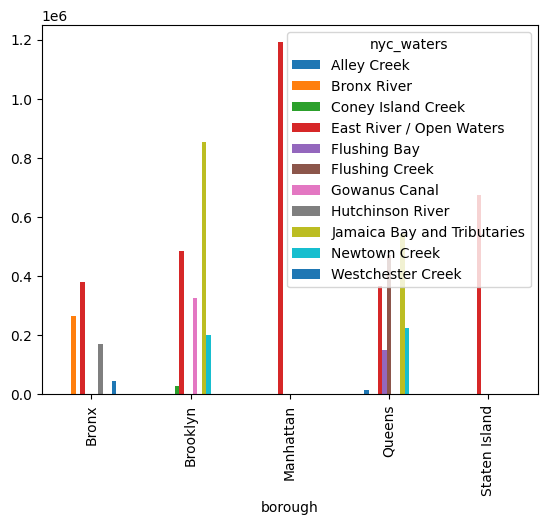

In [ ]:
pluto_ogrio.groupby(["borough","nyc_waters"]).asset_area.sum().unstack().plot.bar()

<Axes: xlabel='nyc_waters'>

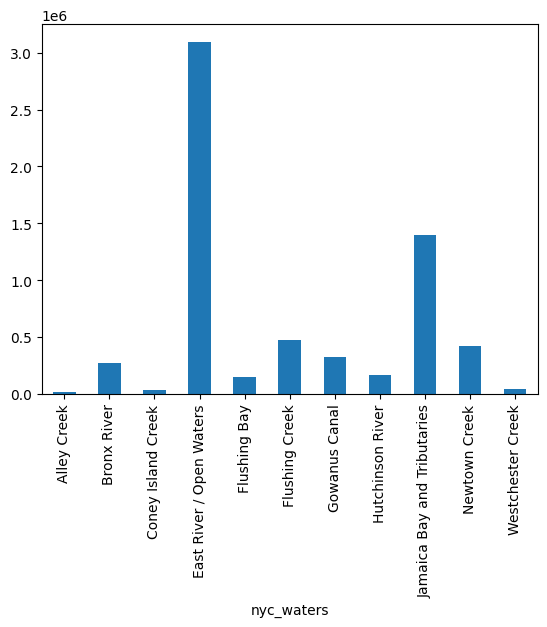

In [ ]:
pluto_ogrio.groupby(["nyc_waters"]).asset_area.sum().plot.bar()

Text(0.5, 1.0, 'Total asset area by water drainage')

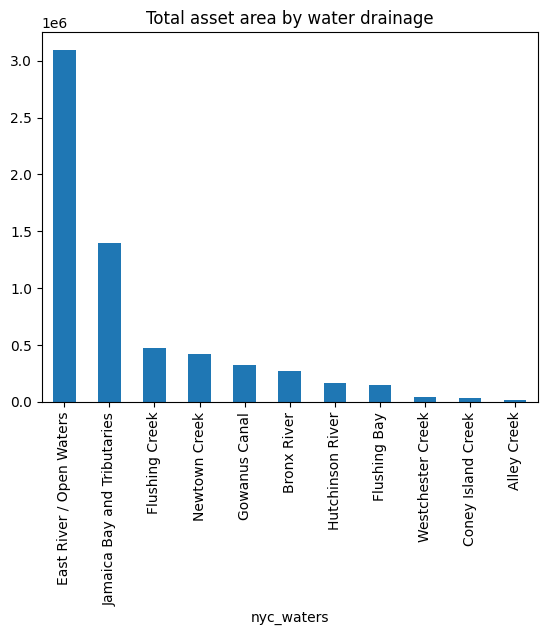

In [ ]:
pluto_ogrio.groupby("nyc_waters").asset_area.sum().sort_values(ascending=False).plot.bar()
plt.title("Total asset area by water drainage")

Text(0.5, 1.0, 'Total building area by land use type')

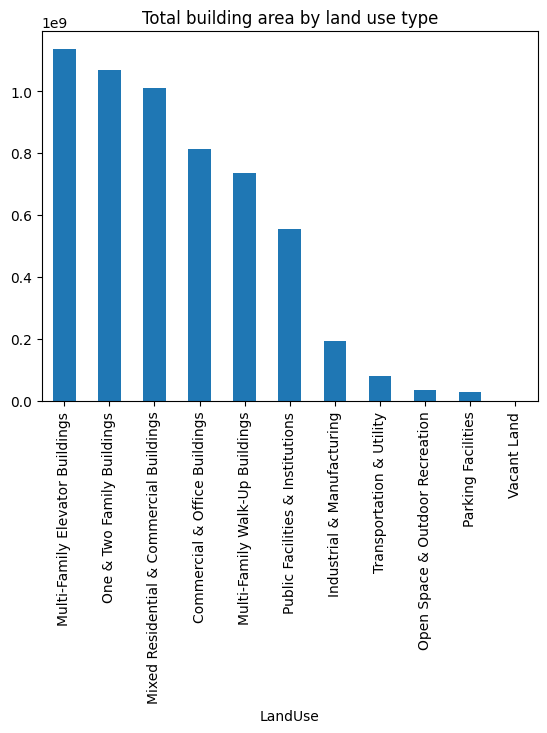

In [ ]:
# now the same but for building area
pluto_ogrio.groupby("LandUse").BldgArea.sum().sort_values(ascending=False).plot.bar()
plt.title("Total building area by land use type")

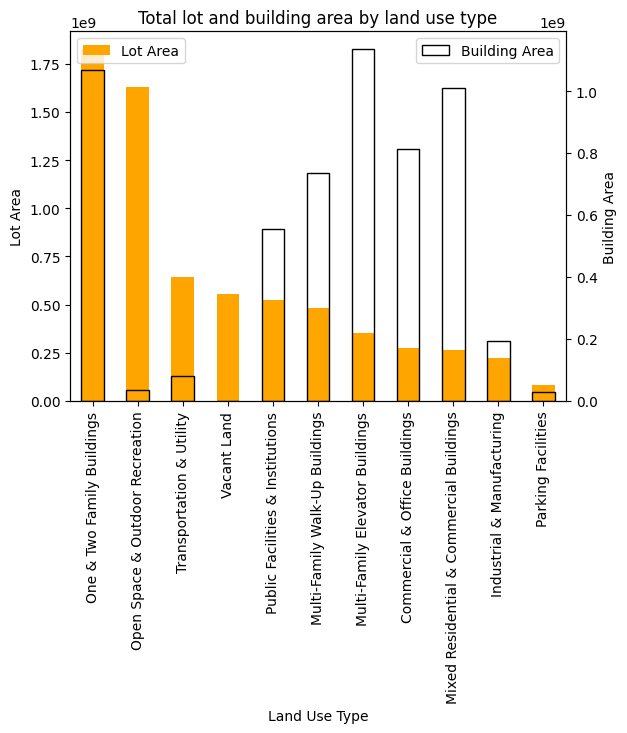

In [ ]:
# plot both lot and building area on the same plot with a secondary y-axis
fig, ax = plt.subplots()
by_lot_area = pluto_ogrio.groupby("LandUse").LotArea.sum().sort_values(ascending=False)

by_lot_area.plot.bar(ax=ax, color="orange")

# get order to apply below
order = {v: i for i, v in enumerate(by_lot_area.index)}

ax.set_ylabel("Lot Area")
ax.set_xlabel("Land Use Type")

ax2 = ax.twinx()
pluto_ogrio.groupby("LandUse").BldgArea.sum().reindex(by_lot_area.index).plot.bar(
    ax=ax2, edgecolor="black", color="none"
)
ax2.set_ylabel("Building Area")

plt.title("Total lot and building area by land use type")

# add legends
ax.legend(["Lot Area"], loc="upper left")
ax2.legend(["Building Area"], loc="upper right")

## numeric column


In [ ]:
pluto_ogrio["NumFloors"].describe()

count    856819.000000
mean          2.357554
std           2.012707
min           0.000000
25%           2.000000
50%           2.000000
75%           2.500000
max         104.000000
Name: NumFloors, dtype: float64

<Axes: ylabel='Frequency'>

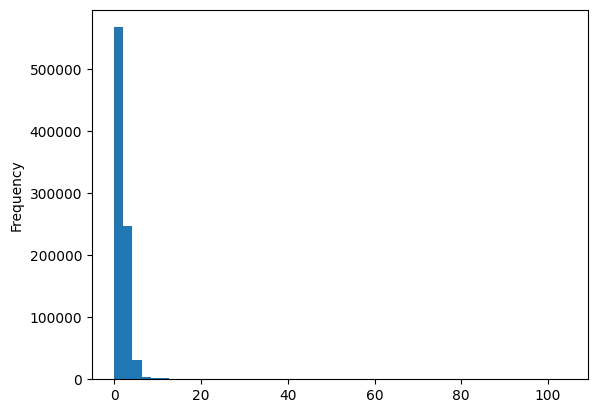

In [ ]:
pluto_ogrio["NumFloors"].plot.hist(bins=50)

## Your turn:

- make a histogram for each borough like above
- then, choose another chart type to visualize the distribution of lot area for each borough. See [here](https://matplotlib.org/stable/plot_types/index.html) for some built in options in matplotlib, or here for [seaborn](https://seaborn.pydata.org/tutorial/distributions.html)


## Ok, now let's make a boxplot to see how wide the range is within each boro's data


<Axes: title={'center': 'NumFloors'}, xlabel='Borough'>

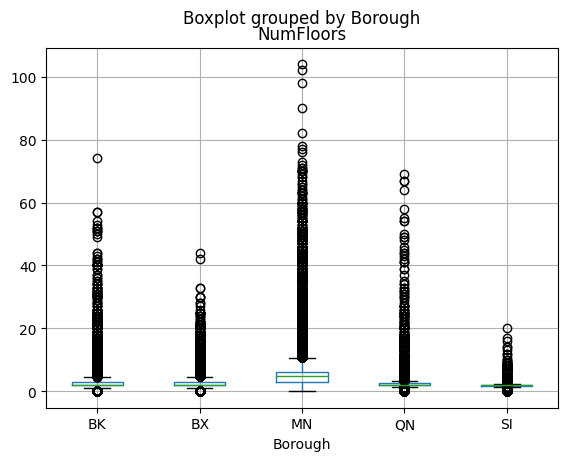

In [ ]:
pluto_ogrio.boxplot(column="NumFloors", by="Borough")

What does this distribution tell us about the number of floors in each borough?


# cluster by number of floors


In [ ]:
# get clusters using kmeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(pluto_ogrio[["NumFloors", "ResArea"]])

pluto_ogrio["NumFloorsCluster"] = kmeans.predict(pluto_ogrio[["NumFloors", "ResArea"]])

In [ ]:
pluto_ogrio.groupby("NumFloorsCluster").NumFloors.describe().sort_values("max")

,count,mean,std,min,25%,50%,75%,max
NumFloorsCluster,,,,,,,,
4,3.0,20.000000,11.269428,13.0,13.5,14.0,23.5,33.0
2,35.0,18.985714,11.616726,0.0,13.5,18.0,24.5,46.0
3,8450.0,9.935355,7.257568,0.0,6.0,6.0,13.0,82.0
1,861.0,23.599303,15.800584,0.0,13.0,20.0,33.0,98.0
0,847470.0,2.259667,1.502801,0.0,2.0,2.0,2.5,104.0


<Axes: xlabel='NumFloors', ylabel='ResArea'>

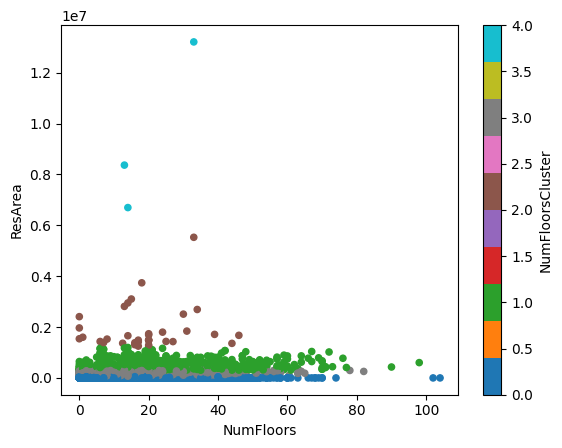

In [ ]:
pluto_ogrio.plot.scatter(x="NumFloors", y="ResArea", c="NumFloorsCluster", cmap="tab10")

<Axes: xlabel='NumFloors', ylabel='ResArea'>

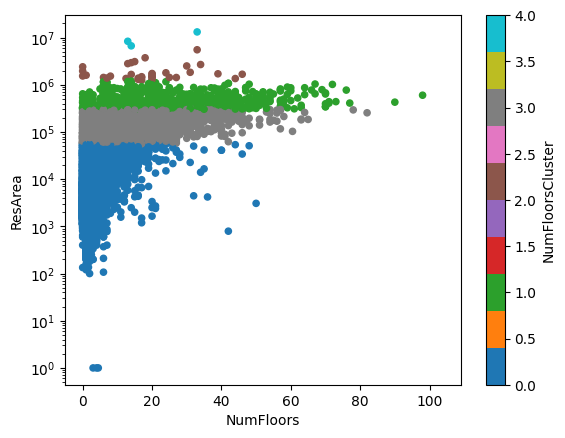

In [ ]:
# same as above but with log y axis
pluto_ogrio.plot.scatter(
    x="NumFloors", y="ResArea", c="NumFloorsCluster", cmap="tab10", logy=True
)

<Axes: ylabel='Frequency'>

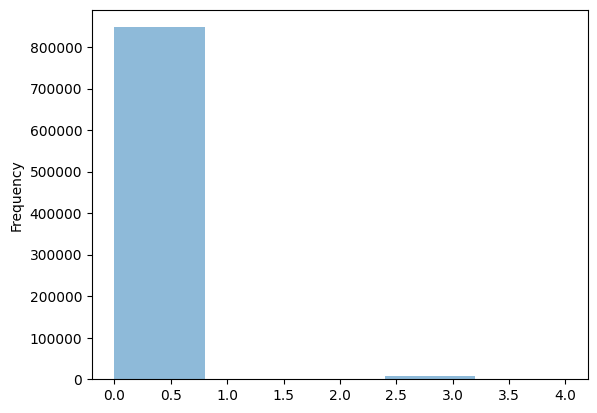

In [ ]:
pluto_ogrio["NumFloorsCluster"].plot.hist(bins=5, alpha=0.5)

# and now, mapping


## static map


Text(0.5, 1.0, 'NYC MapPLUTO')

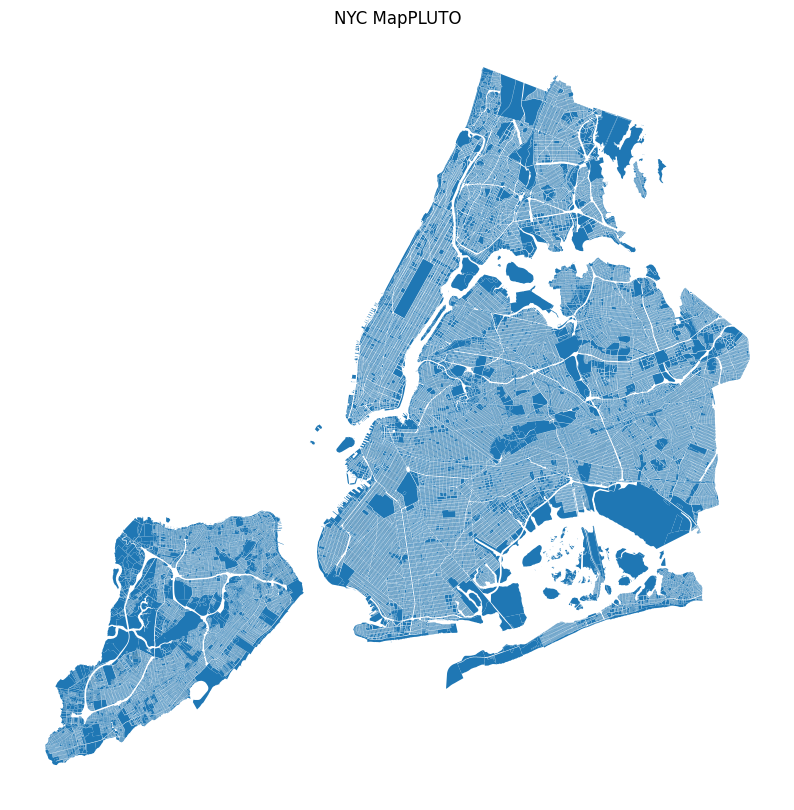

In [ ]:
pluto_ogrio.plot(figsize=(10, 10)).set_axis_off()
plt.title("NYC MapPLUTO")

In [ ]:
cmap = {
    "One & Two Family Buildings": "#ff0000",
    "Multi-Family Walk-Up Buildings": "#00ff00",
    "Multi-Family Elevator Buildings": "#0000ff",
    "Mixed Residential & Commercial Buildings": "#ff00ff",
    "Commercial & Office Buildings": "#00ffff",
    "Industrial & Manufacturing": "#ffff00",
    "Transportation & Utility": "#808080",
    "Public Facilities & Institutions": "#800000",
    "Open Space & Outdoor Recreation": "#008000",
    "Parking Facilities": "#000080",
    "Vacant Land": "#800080",
    "Unknown": "#000000",
}

In [ ]:
pluto_ogrio.fillna({"LandUse": "Unknown"}, inplace=True)

In [ ]:
pluto_ogrio["color"] = pluto_ogrio["LandUse"].map(cmap)

ValueError: Invalid RGBA argument: nan

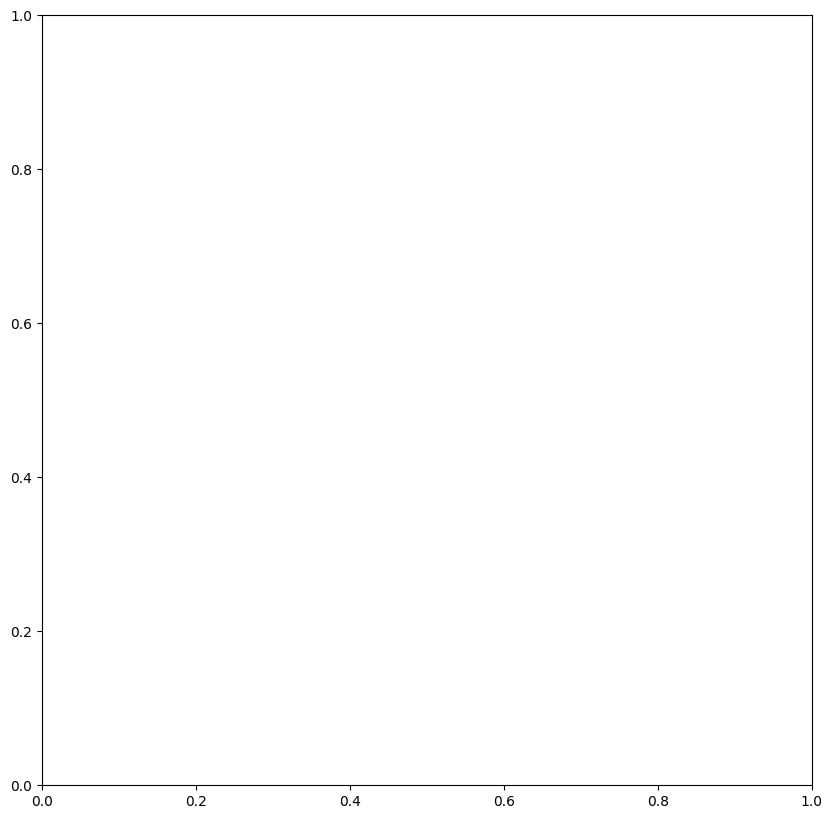

In [ ]:
ax = pluto_ogrio.plot(
    color=pluto_ogrio["color"],
    figsize=(10, 10),
    legend=True,
).set_axis_off()
plt.title("NYC MapPLUTO")


# populate legend items based on dict from above
legend_colors = [
    plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=c, markersize=10)
    for c in cmap.values()
]
labels = cmap.keys()
plt.legend(legend_colors, labels, loc="upper left")

Text(0.5, 1.0, 'NYC MapPLUTO')

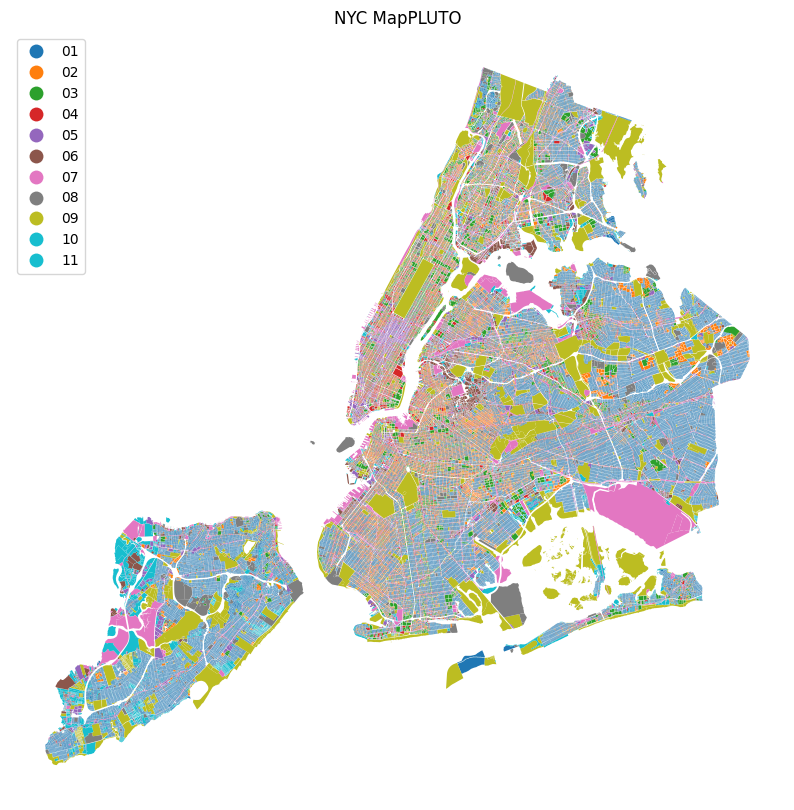

In [ ]:
pluto_ogrio.plot(
    column="LandUse", figsize=(10, 10), legend=True, legend_kwds={"loc": "upper left"}
).set_axis_off()
plt.title("NYC MapPLUTO")

## Your turn:

- map a numeric column using a continuous colormap for Queens. See here for a list and discussion of colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
- What patterns emerge?


<Axes: >

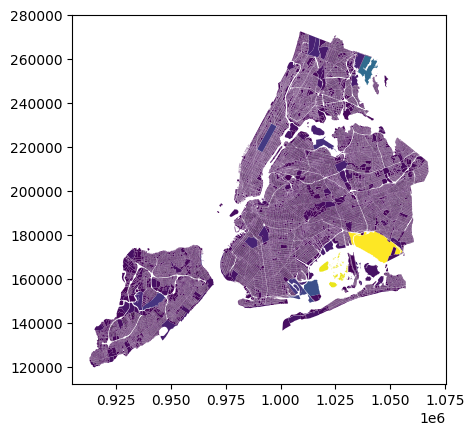

In [ ]:
pluto_ogrio.plot(column="LotArea")

# prep for interactive mapping


In [ ]:
pluto_ogrio_wgs = pluto_ogrio.to_crs("epsg:4326")

## visualize a categorical variable


In [ ]:
cmap_rgb = {k: list(int(v[i : i + 2], 16) for i in (1, 3, 5)) for k, v in cmap.items()}

In [ ]:
cmap_rgb

{'One & Two Family Buildings': [255, 0, 0],
 'Multi-Family Walk-Up Buildings': [0, 255, 0],
 'Multi-Family Elevator Buildings': [0, 0, 255],
 'Mixed Residential & Commercial Buildings': [255, 0, 255],
 'Commercial & Office Buildings': [0, 255, 255],
 'Industrial & Manufacturing': [255, 255, 0],
 'Transportation & Utility': [128, 128, 128],
 'Public Facilities & Institutions': [128, 0, 0],
 'Open Space & Outdoor Recreation': [0, 128, 0],
 'Parking Facilities': [0, 0, 128],
 'Vacant Land': [128, 0, 128],
 'Unknown': [0, 0, 0]}

In [ ]:
len(pluto_ogrio_wgs[pluto_ogrio_wgs["LandUse"].isna()])

2649

In [ ]:
pluto_ogrio_wgs["LandUse"].fillna("Unknown", inplace=True)

/var/folders/zg/m42dmv251nj6ml7dyhj2cgdr0000gn/T/ipykernel_11591/961482650.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pluto_ogrio_wgs["LandUse"].fillna("Unknown", inplace=True)


## uhoh- observe the above warning- re-write the code to avoid this


## now, we can plot the data using lonboard to create an interactive map


In [ ]:
df = pluto_ogrio_wgs[["LandUse", "geometry"]]

layer = PolygonLayer.from_geopandas(
    df[["LandUse", "geometry"]],
    get_fill_color=apply_categorical_cmap(df["LandUse"], cmap=cmap_rgb),
)
m = Map(layer)
m

KeyError: '08'

In [ ]:
pluto_ogrio_wgs["LandUse"] = pluto_ogrio_wgs["LandUse"].astype("category")

In [ ]:
df = pluto_ogrio_wgs[["LandUse", "geometry"]]

layer = PolygonLayer.from_geopandas(
    df[["LandUse", "geometry"]],
    get_fill_color=apply_categorical_cmap(df["LandUse"], cmap=cmap_rgb),
)
m = Map(layer)
m

KeyError: '01'

In [ ]:
pluto_ogrio_wgs[pluto_ogrio_wgs.geometry.isna()]

,Borough,Block,Lot,CD,BCT2020,BCTCB2020,CT2010,CB2010,SchoolDist,Council,...,FIRM07_FLA,PFIRM15_FL,Version,DCPEdited,Latitude,Longitude,Notes,Shape_Leng,Shape_Area,geometry


## visualize a continuous variable


In [ ]:
df = pluto_ogrio_wgs[["NumFloors", "geometry"]]

normalizer = LogNorm(1, df.NumFloors.max(), clip=True)
normalized_floors = normalizer(df.NumFloors)

layer = PolygonLayer.from_geopandas(
    df[["NumFloors", "geometry"]],
    get_fill_color=apply_continuous_cmap(normalized_floors, cmap=PuRd_9),
)
m = Map(layer)
m

Map(layers=[PolygonLayer(get_fill_color=<pyarrow.lib.FixedSizeListArray object at 0x4cfbd4f40>
[
  [
    210,
…

## your turn: can you make the above show in 3d?

- see here for some tips: https://developmentseed.org/lonboard/latest/examples/overture-maps/#imports


In [ ]:
df = pluto_ogrio_wgs[pluto_ogrio_wgs.YearBuilt<1970][["NumFloors", "geometry"]]

normalizer = LogNorm(1, df.NumFloors.max(), clip=True)
normalized_floors = normalizer(df.NumFloors)

layer = PolygonLayer.from_geopandas(
    df[["NumFloors", "geometry"]],
    get_fill_color=apply_continuous_cmap(normalized_floors, cmap=PuRd_9),
    extruded=True,
    get_elevation=pluto_ogrio_wgs["NumFloors"]*14
    
)
m = Map(layer)
m

TraitError: accessor must have same length as table

In [ ]:
pluto_ogrio_wgs[pluto_ogrio.wgs.YearBuilt<1970]

AttributeError: 'GeoDataFrame' object has no attribute 'wgs'

In [ ]:
def categorize_buildings(r);
    if r. YearBuilt < 1900;
        return "Pre-1900"
    elif r.YearBuilt <
    

# save data


In [ ]:
# save out as fgb using geopandas
# pluto_ogrio.to_file("..Data/nyc_mappluto_24v1_1_shp/mappluto.fgb")

In [ ]:
# ogr.write_dataframe(pluto_ogrio, "../Data/nyc_mappluto_24v1_1_shp/mappluto_ogr.fgb")